1 Star Classification
In this project we will determine the type of star based on few parameters given in the dataset by
NASA. First, let’s go thorugh the dataset and try to understand general terms.
This dataset has been taken from kaggle. The dataset has 7 columns as follows:
1. Temperature(K) - Temperature of star in Kelvin
2. Relative Luminosity - RL is the value of the amount of light radiated over time relative to
the luminosity of the sun.
3. Relative Radius - Radius of the star relative to the radius of the sun.
4. Absolute Magnitude - An object’s absolute magnitude is defined to be equal to the apparent magnitude that the object would have if it were viewed from a distance of exactly 10
parsecs (32.6 light-years). Read more here.
5. Color - Color of the star
6. Spectral_Class - stellar classification based on the emission spectrum or color spectrum of
a star, more here.
7. Type - type of star classified based on the hotness level of a star, more here.
From 0 to 5
• Red Dwarf - 0
• Brown Dwarf - 1
• White Dwarf - 2
• Main Sequence - 3
• Super Giants - 4
• Hyper Giants - 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
%matplotlib inline

In [14]:
#reading dataset
df_stars = pd.read_csv("Stars.csv")
df_stars.head()


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [15]:
 df_stars.shape

(240, 7)

In [16]:
df_stars.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


2 Exloratory Data Analysis
2.1 Categorical Co-relation

In [17]:
df_stars.dtypes


Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

The datatypes are correctly assigned for each column. Here Temperature is in Kelvin and we will leave its datatype as int64 instead of changing it to float. Color and Spectral_Class will be object
datatype since they are string values.

In [18]:
 #checking for the null values
df_stars.isnull().sum(axis=0)


Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

There are no missing values in our dataset and it looks clean to carry out exploratory analysis.


In [20]:
#co-relating color and Type of the star
df_stars['Color'] = df_stars['Color'].str.lower() #converting all color types to lowercase
df_stars[['Type','Color']].value_counts().sort_values()


Type  Color             
3     orange-red             1
2     white-yellow           1
      pale yellow orange     1
3     whitish                2
5     white                  2
      orange                 2
3     yellowish              3
2     yellowish white        3
3     blue                   5
5     blue-white             6
      blue                   7
2     white                  8
3     yellow-white           8
4     red                    9
2     blue                  13
      blue white            14
3     blue-white            21
5     red                   23
4     blue                  31
1     red                   40
0     red                   40
dtype: int64

Formatting the color types and merging the color with the similar name.



In [21]:
df_stars['Color'].replace('white-yellow', 'yellow-white', inplace=True)
df_stars['Color'].replace('yellowish white', 'yellow-white', inplace=True)
df_stars['Color'].replace('blue white', 'blue-white', inplace=True)
df_sorted = df_stars[['Type','Color']].value_counts().sort_values()
df_sorted

Type  Color             
2     pale yellow orange     1
3     orange-red             1
5     white                  2
3     whitish                2
5     orange                 2
3     yellowish              3
2     yellow-white           4
3     blue                   5
5     blue-white             6
      blue                   7
3     yellow-white           8
2     white                  8
4     red                    9
2     blue                  13
      blue-white            14
3     blue-white            21
5     red                   23
4     blue                  31
1     red                   40
0     red                   40
dtype: int64

A sorted table to see the counts of Types for each spectral class is given below

In [22]:
df_stars[['Spectral_Class','Type']].value_counts().sort_values()


Spectral_Class  Type
G               5        1
B               4        2
K               5        2
A               5        2
K               3        4
O               3        5
                5        6
B               5        7
A               2        7
F               3        8
                2        9
M               4        9
A               3       10
B               3       13
M               5       22
B               2       24
O               4       29
M               1       40
                0       40
dtype: int64

It seems most of the Types fall in M and O class based on the total counts for each type and
conversly most of the Class M and Class O has Type 1, Type 0 and Type 4 stars.


Let’s visualize further relationships between other features.

C:\Users\nigdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


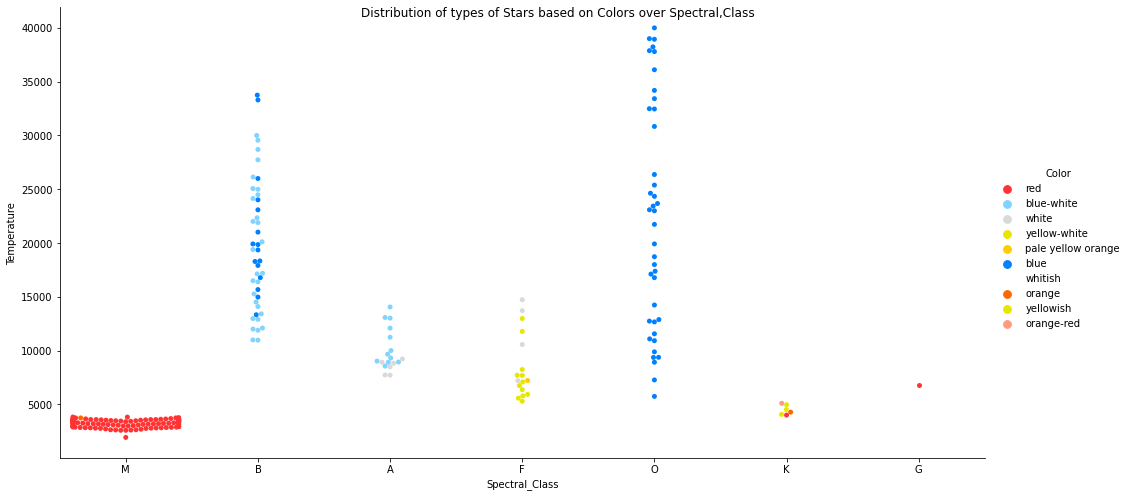

In [24]:
palette=["#ff3333", "#80d4ff","#d9d9d9","#e6e600","#ffcc00","#0080ff","w","#ff6600","#e6e600","#ff9980"]
sns.catplot(x = 'Spectral_Class',y = 'Temperature', hue='Color',kind='swarm',data=df_stars, height=7, aspect=2,ci=None, palette=palette)
plt.suptitle("Distribution of types of Stars based on Colors over Spectral,Class")
plt.show()


Most of the red color stars belong to Spectral Class M and similarly most of the blue stars belong
to B and O spectral class. However we can see that there are very few stars that belong to K and G
class. These might prove to be impurities during the machine learning process. Let’s try to count
total number of stars for each color.


In [25]:
df_colors = df_stars['Color'].value_counts()
df_colors = df_colors.reset_index()
df_colors.columns = ['Color','Counts']
df_colors['percent-accounting'] = round(df_colors['Counts']/df_colors['Counts'].sum(),4)
df_colors

,Color,Counts,percent-accounting
0,red,112,0.4667
1,blue,56,0.2333
2,blue-white,41,0.1708
3,yellow-white,12,0.0500
4,white,10,0.0417
5,yellowish,3,0.0125
6,whitish,2,0.0083
7,orange,2,0.0083
8,pale yellow orange,1,0.0042
9,orange-red,1,0.0042


Stars with red color accounts for 46.67 % among all the colors and next is blue color stars with
23.33% weightage. We can see that Whitish, Orange, pale yellow orange and orange-red account
for very less amount fo stars

We will visualize this to better understand the relationship between the colors and type of a star.


C:\Users\nigdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(6, 12000, '2')

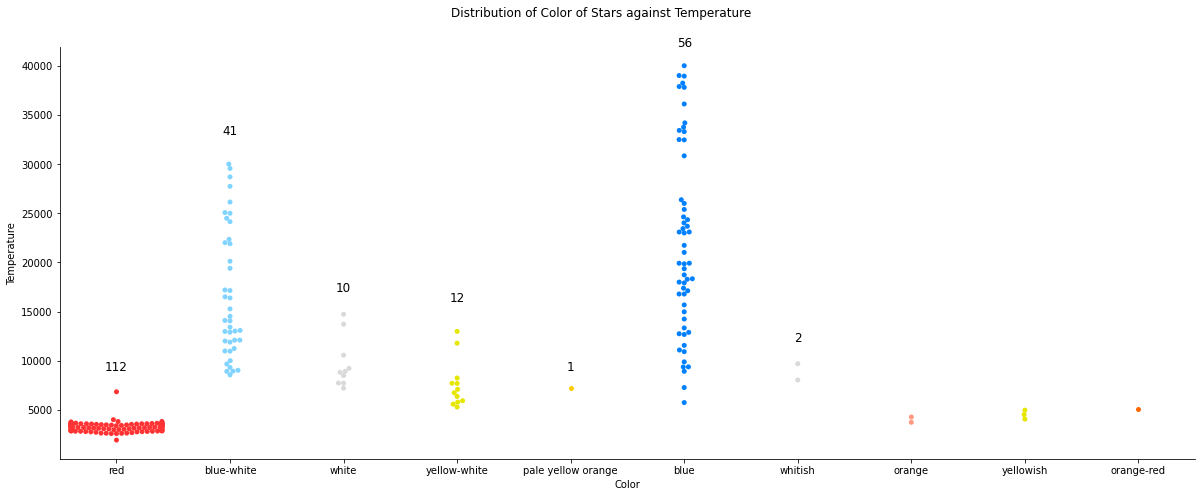

In [27]:
palette=["#ff3333", "#80d4ff","#d9d9d9","#e6e600","#ffcc00","#0080ff","#d9d9d9","#ff9980","#e6e600","#ff6600"]
ax= sns.catplot(x= 'Color',y = 'Temperature', hue='Color',kind='swarm',
data=df_stars, height=7, aspect=2.4,ci=None, palette=palette)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Distribution of Color of Stars against Temperature")
#assigning right color to each color group
plt.text(-0, 9000, str(df_stars['Color'].value_counts()[0]),
horizontalalignment='center', size='large', color='black')
plt.text(1, 33000, str(df_stars['Color'].value_counts()[2]),
horizontalalignment='center', size='large', color='black')
plt.text(2, 17000, str(df_stars['Color'].value_counts()[4]),
horizontalalignment='center', size='large', color='black')
plt.text(3, 16000, str(df_stars['Color'].value_counts()[3]),
horizontalalignment='center', size='large', color='black')
plt.text(4, 9000, str(df_stars['Color'].value_counts()[8]),
horizontalalignment='center', size='large', color='black')
plt.text(5, 42000, str(df_stars['Color'].value_counts()[1]),
horizontalalignment='center', size='large', color='black')
plt.text(6, 12000, str(df_stars['Color'].value_counts()[6]),
horizontalalignment='center', size='large', color='black')

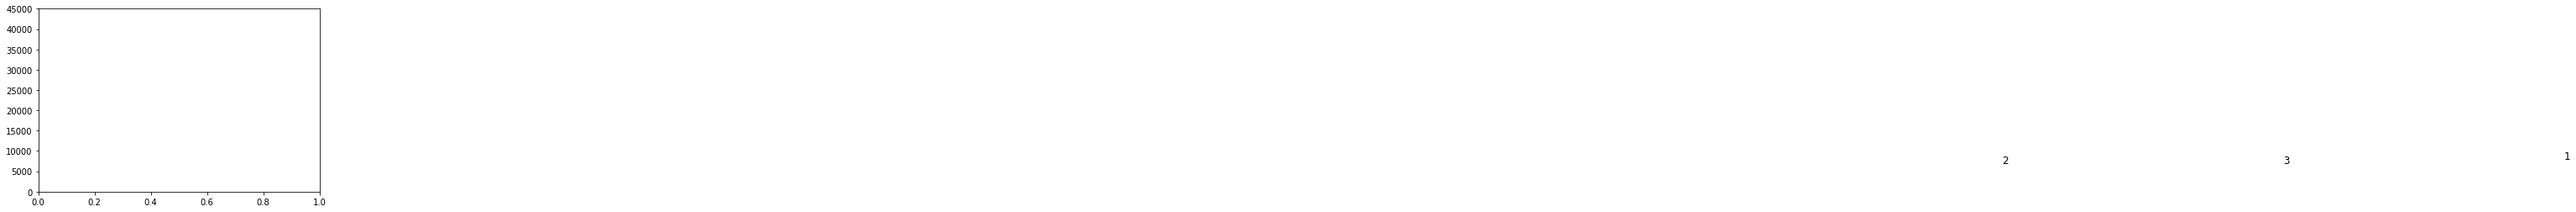

In [28]:
plt.text(7, 7000, str(df_stars['Color'].value_counts()[7]),
horizontalalignment='center', size='large', color='black')
plt.text(8, 7000, str(df_stars['Color'].value_counts()[5]),
horizontalalignment='center', size='large', color='black')
plt.text(9, 8000, str(df_stars['Color'].value_counts()[9]),
horizontalalignment='center', size='large', color='black')
plt.ylim(0, 45000)
plt.show()


There are very few Types of stars that co relate to Orange, Yellowish and Orange-red colors. They
are the outliers which can alter the prediction during the machine learning. There are two actions
that can be performed here to eradicate outliers. 1. To remove the outliers 2. To change their
classification to the closest type resemblance


For the stars that are Whitish in color we can merge them with White color as they both have
similar temperature range. We can do this by renaming the whitish color to white, thus merging
them.


It is the best practice to remove the remaining outliers since they will alter the prediction of Type
of a star.

In [29]:
print("Type of stars of White color")
print(df_stars[df_stars['Color']=='white'].Type)
print("Type of stars of Whitish color")
print(df_stars[df_stars['Color']=='whitish'].Type)


Type of stars of White color
21     2
22     2
23     2
81     2
82     2
88     2
147    2
148    2
237    5
238    5
Name: Type, dtype: int64
Type of stars of Whitish color
33    3
35    3
Name: Type, dtype: int64


It appears that the Types don’t match hence outliers with Whitish color can be removed

In [30]:
print("Type of stars for red color")
print(df_stars[df_stars['Color']=='red'].Type)
print("Type of stars for Orange color")
print(df_stars[df_stars['Color']=='orange'].Type)
print("Type of stars for Orange-red color")
print(df_stars[df_stars['Color']=='orange-red'].Type)

Type of stars for red color
0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Type, Length: 112, dtype: int64
Type of stars for Orange color
53     5
172    5
Name: Type, dtype: int64
Type of stars for Orange-red color
96    3
Name: Type, dtype: int64


Here as well, there is no match in Types of two differencet colors schemes hence outliers having
orange and orange-red colors needs to be removed.

In [31]:
print("Type of stars for yellow-white color")
print(df_stars[df_stars['Color']=='yellow-white'].Type)
print("Type of stars for yellowish color")
print(df_stars[df_stars['Color']=='yellowish'].Type)


Type of stars for yellow-white color
25     2
27     2
28     2
34     3
36     3
37     3
38     3
39     3
80     2
90     3
97     3
219    3
Name: Type, dtype: int64
Type of stars for yellowish color
91    3
92    3
93    3
Name: Type, dtype: int64


For yellowish color stars, we can observe that thier types are similar to the stars having Yellow-white
color scheme. Hence we will change the color of Yellowish to yellow-white thus merging them.

In [34]:
 #dropping the rows with following colors
df_stars.drop(df_stars[df_stars.Color == 'whitish'].index,axis=0, inplace=True)
df_stars.drop(df_stars[df_stars.Color == 'orange'].index, axis=0,inplace=True)
df_stars.drop(df_stars[df_stars.Color == 'orange-red'].
index,axis=0,inplace=True)
df_stars.drop(df_stars[df_stars.Color == 'pale yellow orange'].
index,axis=0,inplace=True)
#changing the color of yellowish to yellow-white since they belong to same Type
df_stars.replace('yellowish', 'yellow-white', inplace=True)


C:\Users\nigdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Distribution of Color of Stars against Temperature')

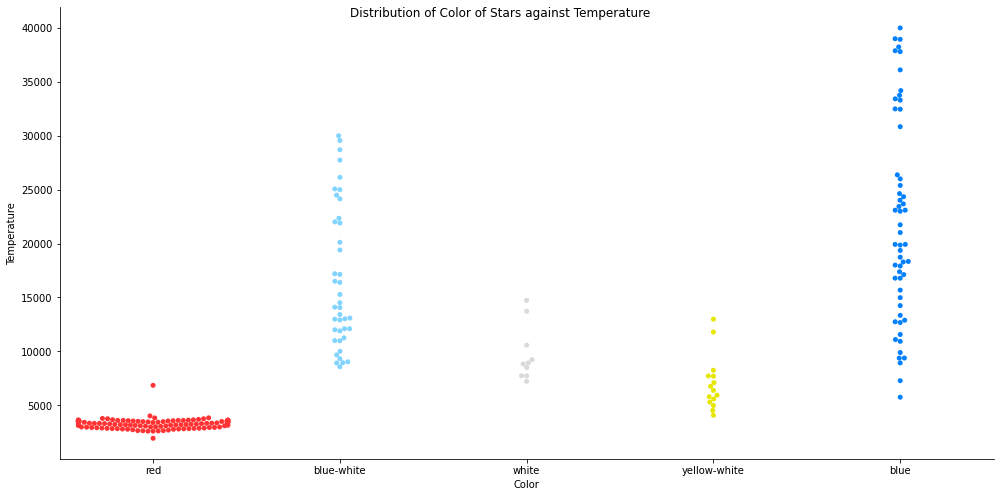

In [35]:
 #Again having a look at the categorical plot of Temperature, Type and Color
palette=["#ff3333", "#80d4ff", "#d9d9d9","#e6e600","#0080ff","#ff6600"]
ax = sns.catplot(x= 'Color',y = 'Temperature', hue='Color',kind='swarm',
data=df_stars, height=7, aspect=2,ci=None, palette=palette)
ax.fig.suptitle("Distribution of Color of Stars against Temperature")

All the data now looks nicely distriuted among the catergories of colors. It can said that Blue color
stars have temperature ranging from 5000 K to 40000 K where as red color stars have temperatures
below 5000 K. It is a noticebale difference from the such visualization

In [36]:
df_total = df_stars[['Color','Type']]
df_total= pd.DataFrame(df_total[['Type','Color']].value_counts())
df_total = df_total.reset_index()
df_total.columns = ['Type','Color','Counts']
df_total

,Type,Color,Counts
0,0,red,40
1,1,red,40
2,4,blue,31
3,5,red,23
4,3,blue-white,21
5,2,blue-white,14
6,2,blue,13
7,3,yellow-white,11
8,4,red,9
9,2,white,8


Plotting above information in form of a bar plot.

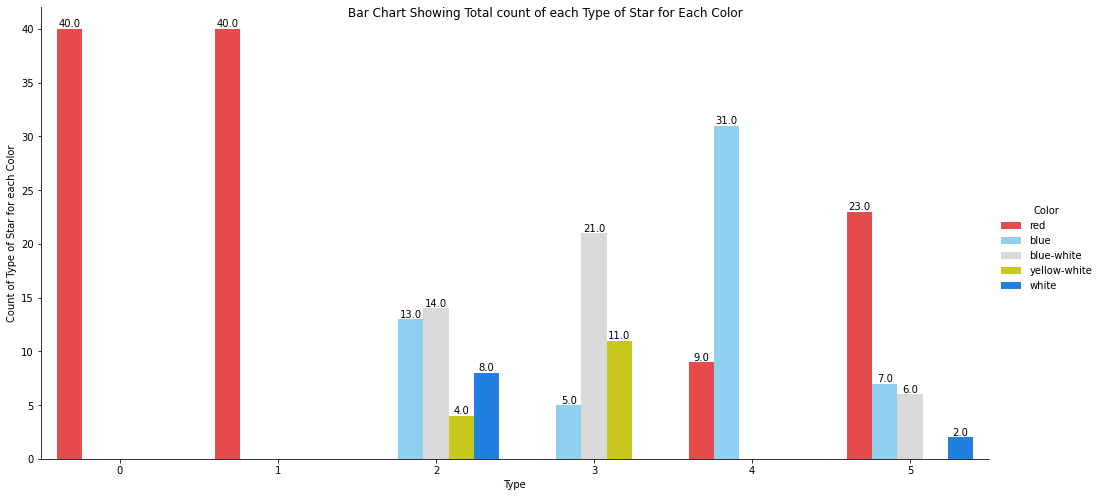

In [38]:
palette=["#ff3333", "#80d4ff", "#d9d9d9","#e6e600","#0080ff"]
splot = sns.catplot(x= 'Type',y = 'Counts', hue='Color',kind='bar', height=7,
aspect=2, data=df_total,ci=None, palette=palette)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = splot.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{v.get_height()}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.ylabel("Count of Type of Star for each Color")
plt.suptitle("Bar Chart Showing Total count of each Type of Star for Each Color")
plt.show()

2.2 Numerical Co-relation

In [39]:
 df_stars.corr()

,Temperature,L,R,A_M,Type
Temperature,1.000000,0.421282,0.078035,-0.431351,0.425730
L,0.421282,1.000000,0.498144,-0.693158,0.674650
R,0.078035,0.498144,1.000000,-0.604505,0.656357
A_M,-0.431351,-0.693158,-0.604505,1.000000,-0.955797
Type,0.425730,0.674650,0.656357,-0.955797,1.000000


A correlation matrix above shows that Type of star is closely related to L (luminosity) and then R
(radius of star) than any other numerical parameter. A value closer to 1 has the highest corelation
or dependency.


<AxesSubplot:xlabel='Type', ylabel='Temperature'>

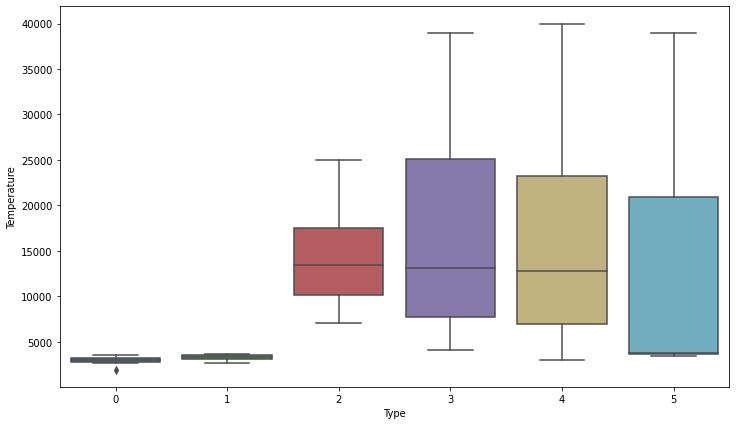

In [40]:
#visulaize by plotting box plot
fid,ax = plt.subplots(figsize=(12,7))
sns.boxplot(y=df_stars['Temperature'], x=df_stars['Type'], data=df_stars, ax=ax)


It seems that temperatures lower than approximately 4500 K accounts for Type 0 and Type 1 star.
Let’s deep dive more into Type 0 and Type 1 stars to find more co-relations.

In [41]:
 #filtering type 0 and type 1 star and grouping them by color
df_01 = df_stars[(df_stars['Type'] ==0) | (df_stars['Type']==1)]
df_01.groupby(['Color']).mean().value_counts()

Temperature  L        R        A_M        Type
3140.8875    0.00305  0.22908  15.051737  0.5     1
dtype: int64

There is only one color of type 0 and type 1 star and it is inferred that temperatures relating to
these two types are lower than 4500 K. Now, let’s get some insight into temperature and its relation
to Luminosity and Radius of a star.

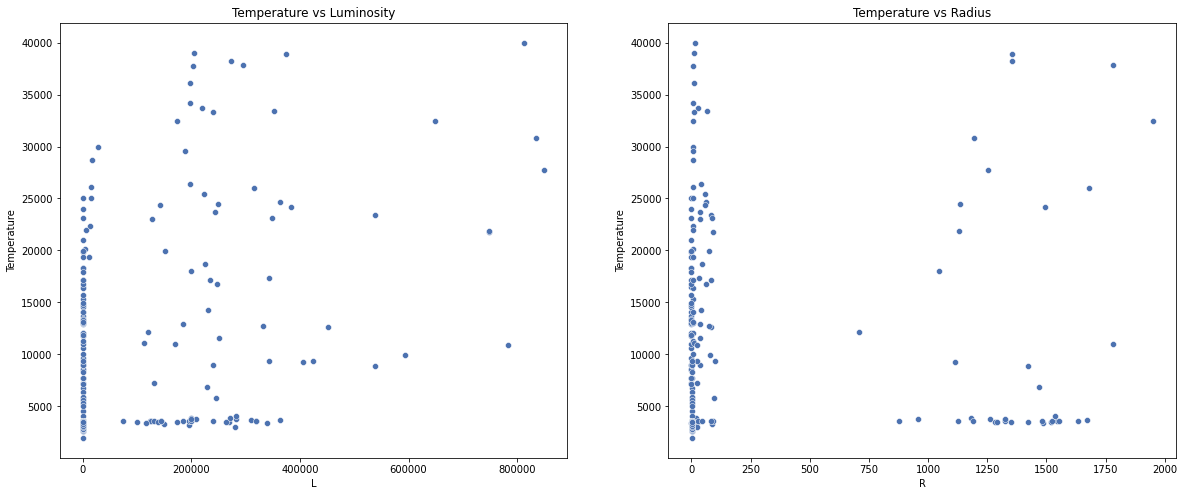

In [43]:
 #plotting a scatter plot between temperature and luminosity
fig, axes = plt.subplots(1,2, figsize=(20,8))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
sns.scatterplot(x=df_stars['L'], y=df_stars['Temperature'], data=df_stars,
ax=axes[0])
axes[0].set_title("Temperature vs Luminosity")
sns.scatterplot(x=df_stars['R'], y=df_stars['Temperature'], data=df_stars,
ax=axes[1])
axes[1].set_title("Temperature vs Radius")
plt.show()

Neither Luminosity nor Radius have consistent relation with Temperature of the star. They are
independent feature of each other but they are directly related to Type of a star. However, the
question is what about the relationshio between Luminosity and Radius.

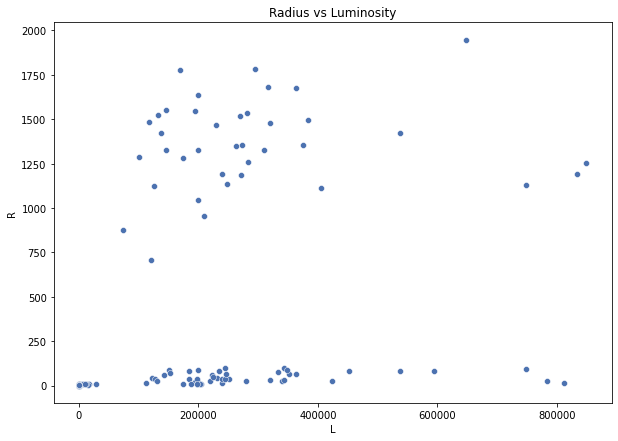

In [44]:
#relation between luminosity and radius
fig, axes = plt.subplots(figsize=(10,7))
sns.scatterplot(x=df_stars['L'], y=df_stars['R'], data=df_stars, ax=axes)
axes.set_title("Radius vs Luminosity")
plt.show()


Even R vs L does not show much consistent dependency on each other, but it is slightly better
than afore mentioned other two relations.


2.3 One hot Encoding

Since we wil be including spectral class and Colors into our machine learning model we need to
convert it into numerical data beore proceeding. One of the common method used for this purpose
is called One Hot Encoding.

In [45]:
df_stars = pd.get_dummies(df_stars)
df_stars.head()


,Temperature,L,R,A_M,Type,Color_blue,Color_blue-white,Color_red,Color_white,Color_yellow-white,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,1,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,1,0,0,0,0,0,0,0,1,0


3 Modeling


Since this is a problem with multi class labels and our features based on analysis don’t show any
linear relationship, we will use Random Forest alogrithm for better classification. In comparision
we will also use AdaBoost Classifier to make some comparisions.

In [46]:
#imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

Type column is removed from our dataframe to separate it from our predictor features.

In [47]:
features = df_stars.drop('Type', axis=1)
features.head()


,Temperature,L,R,A_M,Color_blue,Color_blue-white,Color_red,Color_white,Color_yellow-white,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,1,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,1,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,1,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,1,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,1,0,0,0,0,0,0,0,1,0


3.0.1 Random Forest Model

In [48]:
X = features
y = df_stars.Type
#splitting the data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
#creating object of model
clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=8,
min_samples_split=5,bootstrap=True, random_state=23)
clf.fit(X_train, y_train)
#predicting
y_pred = clf.predict(X_test)
#accuracy measure
acc = accuracy_score(y_test, y_pred)
#precision measure
precision = precision_score(y_test, y_pred, average='weighted')
print("accuracy score of Random Forest Classifier is {}".format(acc))
print("Precision score of Random Forest Classifier is {}".format(precision))


accuracy score of Random Forest Classifier is 0.9859154929577465
Precision score of Random Forest Classifier is 0.9867957746478874


In [49]:
print("Validation score of Random Forest Classifier is {}".format(clf.score(X_test,y_test)))

Validation score of Random Forest Classifier is 0.9859154929577465


[Text(0.5, 0.9, '2600 <= 9.32\ngini = 0.831\nsamples = 104\nvalue = [25, 28, 28, 22, 32, 28]\nclass = 4'),
 Text(0.25, 0.7, '2600 <= 0.035\ngini = 0.748\nsamples = 70\nvalue = [25, 28, 28, 22, 0, 0]\nclass = 1'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 28, 0, 0, 0]\nclass = 2'),
 Text(0.375, 0.5, '2650 <= 0.5\ngini = 0.663\nsamples = 51\nvalue = [25, 28, 0, 22, 0, 0]\nclass = 1'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 22, 0, 0]\nclass = 3'),
 Text(0.5, 0.3, '2800 <= 15.575\ngini = 0.498\nsamples = 36\nvalue = [25, 28, 0, 0, 0, 0]\nclass = 1'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 28, 0, 0, 0, 0]\nclass = 1'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [25, 0, 0, 0, 0, 0]\nclass = 0'),
 Text(0.75, 0.7, '2800 <= -7.515\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 0, 32, 28]\nclass = 4'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 0, 28]\nclass = 5'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples =

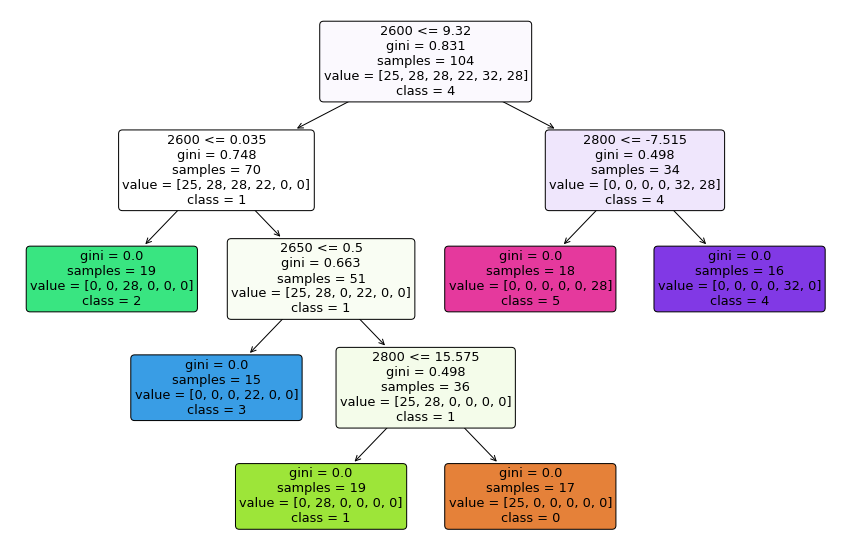

In [50]:
#plotting a tree to visualize the decision tree modeling
from sklearn import tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[0],
            feature_names=df_stars.Temperature,
            class_names=['0','1','2','3','4','5'],
            filled=True, impurity=True,
            rounded=True)


In [52]:
pip install yellowbrick


     ------------------------------------ 274.2/274.2 kB 804.6 kB/s eta 0:00:00


C:\Users\nigdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


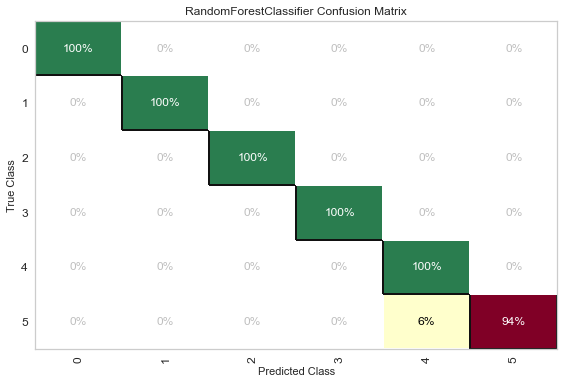

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [53]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
visualizer = ConfusionMatrix(clf,classes=['0','1','2','3','4','5'],percent=True)
visualizer.fit(X_train, y_train) # Fit the visualizer and the model
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show()

Above confusion metrix shows each type of class correctly classified except Type 5 where few labels
are wrongly classified as Type 4

C:\Users\nigdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


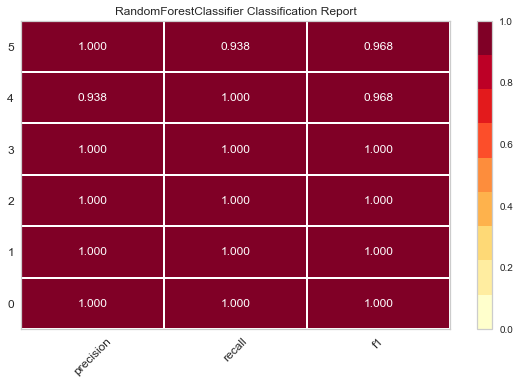

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [54]:
 from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(clf,classes=['0','1','2','3','4','5'],percent=True)
visualizer.fit(X_train, y_train) # Fit the visualizer and the model
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.poof()


A classification report demonstrates precision, recall and F1 score for all the class labels available
for random forest classifier.


3.1 Conclusion


1. Model correctly identifies the Type of a star with an accuracy of 0.98% for Random forest
model and 1% accuracy for AdaBoost model.
2. Stars having temperatues below 5000 K and color as red are mostly of Type 1 or 0.
3. There are very few stars with Orange and Orange-red spectrum.
4. There is inconsistent corelation between Temperature vs Luminosity and Radius.